<a href="https://colab.research.google.com/github/ThomasShaff/3D-room-with-searching-algorithm-for-a-target/blob/Code/3D%20Room%20%26%20Drone%20(target%20searching).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import randint
from math import sqrt

class Salle :
    def __init__(self, Lx, Ly, H):
        self.salle = []
        self.longueur = Lx+1
        self.largeur = Ly+1
        self.hauteur = H+1

    def longueurs(self):
        return self.longueur,self.largeur,self.hauteur

    def createRoom(self):
        for h in range(self.hauteur):
            self.salle.append(h)
            for x in range(self.longueur):
                for y in range(self.largeur):
                    self.salle.append([y,x])

    def createTarget(self,xmax,ymax,zmax):
        xc = randint(0,xmax)
        yc = randint(0,ymax)
        zc = randint(0,zmax)
        h = 0

        for i,e in enumerate(self.salle):
            if isinstance(e, str):
                continue
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                x,y = e[1],e[0]
                if h == zc and x == xc and y == yc :
                    self.salle[i].append(-1)
        return [xc,yc,zc]

    def affichage(self):
        print(self.salle)

    def posDrone(self,drone,x=0,y=0,z=0):
        h=0
        x = drone.getPos()[0]
        y = drone.getPos()[1]
        z = drone.getHeight()

        for i,e in enumerate(self.salle):
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                xs,ys = e[0],e[1]
                if h == z and xs == x and ys == y :
                    self.salle[i].append("d")
        return [x,y,z]



class Drone:
    def __init__(self,px = 0, py = 0, pz = 0, map = []):
        self.salle = map
        self.coo_x = px
        self.coo_y = py
        self.coo_z = pz
        self.hastakeOff = False

    def takeOff(self,h=80):
        if self.coo_z == 0:
            self.coo_z = h
            self.hastakeOff = True
    def land(self):
        if self.hastakeOff:
            self.coo_z = 0

    def forward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x += n

    def backward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x -= n

    def up(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z += n

    def down(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z -= n

    def left(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y += n

    def right(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y -= n

    def getPos(self):
        return [self.coo_x,self.coo_y]

    def getHeight(self):
        return self.coo_z

    def TargetDetected(self,c_target,c_drone,rayon = 20):
        xt, yt, zt = c_target[0],c_target[1],c_target[2]
        xc, yc, zc = c_drone[0],c_drone[1],c_drone[2]
        distance = sqrt((xc-xt)**2+(yc-yt)**2+(zc-zt)**2)
        if distance <= rayon:
            return True
        return False


class Algo :
    def __init__(self,drone = None,map = [],choix = 1):
        self.drone = drone
        self.salle = map
        self.choix = choix

    def lancement(self):
        self.drone.takeOff(2)

    def c_drone(self):
        return [self.drone.getPos()[0],self.drone.getPos()[1],self.drone.getHeight()]

    def fin(self,c_target,rayon):
        return self.drone.TargetDetected(c_target, self.c_drone(), rayon)

    def algo1(self):
        self.lancement()
        c_max_x, c_max_y, c_max_z = self.salle.longueurs()
        target =  self.salle.createTarget(c_max_x, c_max_y, c_max_z)

        variation_x = 1
        variation_y = 1
        variation_z = 1
        rayon = 5
        it = 0

        while not self.fin(target,rayon) and it < 5000:
            it += 1
                # 🔹 Balayage gauche → droite
            while self.c_drone()[1] + variation_y < c_max_y:

                while self.c_drone()[0] + variation_x <= c_max_x:
                    self.drone.forward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                self.drone.left(variation_y)

                while self.c_drone()[0] - variation_x >= 0:
                    self.drone.backward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                if self.c_drone()[1] + variation_y < c_max_y:
                    self.drone.left(variation_y)

            if self.drone.getHeight() + variation_z < c_max_z:
                self.drone.up(variation_z)
            else:
                break

            while self.c_drone()[1] - variation_y > 0:

                while self.c_drone()[0] + variation_x <= c_max_x:
                    self.drone.forward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                self.drone.right(variation_y)

                while self.c_drone()[0] - variation_x >= 0:
                    self.drone.backward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                if self.c_drone()[1] - variation_y > 0:
                    self.drone.right(variation_y)

            if self.drone.getHeight() + variation_z < c_max_z:
                self.drone.up(variation_z)
            else:
                break

        if self.fin(target, rayon):
            return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"
        else:
            return f"❌ Fin sans détection après {it} itérations. Dernière position : {self.c_drone()} | Les coordonées de la cible sont : {target}"

    def executer(self):
        if self.choix == 1:
            return self.algo1()

salle = Salle(500,500,250)
d = Drone()
algo = Algo(d,salle)
algo.executer()

'Cible trouvée ! Les coordonnées du drone sont : [228, 374, 238] et celles de la cible sont : [228, 374, 243] !'

In [ ]:
from random import randint
from math import sqrt

class Salle :
    def __init__(self, Lx, Ly, H):
        self.salle = []
        self.longueur = Lx+1
        self.largeur = Ly+1
        self.hauteur = H+1

    def longueurs(self):
        return self.longueur-1,self.largeur-1,self.hauteur-1

    def createRoom(self):
        for h in range(self.hauteur):
            self.salle.append(h)
            for x in range(self.longueur):
                for y in range(self.largeur):
                    self.salle.append([y,x])
        return self.salle

    def createTarget(self,xmax,ymax,zmax):
        xc = randint(0,xmax)
        yc = randint(0,ymax)
        zc = randint(0,zmax)
        h = 0

        for i,e in enumerate(self.salle):
            if isinstance(e, str):
                continue
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                x,y = e[1],e[0]
                if h == zc and x == xc and y == yc :
                    self.salle[i].append(-1)
        return [xc,yc,zc]

    def affichage(self,coordonnees = None):
        print(coordonnees,self.salle)

    def posDrone(self,drone,x=0,y=0,z=0):
        h=0
        x = drone.getPos()[0]
        y = drone.getPos()[1]
        z = drone.getHeight()

        for i,e in enumerate(self.salle):
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                xs,ys = e[0],e[1]
                if h == z and xs == x and ys == y :
                    self.salle[i].append("d")
        return [x,y,z]



class Drone:
    def __init__(self,px = 0, py = 0, pz = 0, map = []):
        self.salle = map
        self.coo_x = px
        self.coo_y = py
        self.coo_z = pz
        self.hastakeOff = False

    def takeOff(self,h=80):
        if self.coo_z == 0:
            self.coo_z = h
            self.hastakeOff = True
    def land(self):
        if self.hastakeOff:
            self.coo_z = 0

    def forward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x += n

    def backward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x -= n

    def up(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z += n

    def down(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z -= n

    def left(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y += n

    def right(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y -= n

    def getPos(self):
        return [self.coo_x,self.coo_y]

    def getHeight(self):
        return self.coo_z

    def TargetDetected(self,c_target,c_drone,rayon = 20):
        xt, yt, zt = c_target[0],c_target[1],c_target[2]
        xc, yc, zc = c_drone[0],c_drone[1],c_drone[2]
        distance = sqrt((xc-xt)**2+(yc-yt)**2+(zc-zt)**2)
        if distance <= rayon:
            return True
        return False


class Algo :
    def __init__(self,drone = None,map = [],choix = 1):
        self.drone = drone
        self.salle = map
        self.choix = choix

    def lancement(self):
        self.drone.takeOff(2)

    def c_drone(self):
        return [self.drone.getPos()[0],self.drone.getPos()[1],self.drone.getHeight()]

    def fin(self,c_target,rayon):
        return self.drone.TargetDetected(c_target, self.c_drone(), rayon)

    def algo1(self):
        self.lancement()
        c_max_x, c_max_y, c_max_z = self.salle.longueurs()
        target = self.salle.createTarget(c_max_x, c_max_y, c_max_z)

        variation_x = 1
        variation_y = 1
        variation_z = 1
        rayon = 5

        for i in range(c_max_z) :
                # 🔹 Balayage gauche → droite
            for i in range(c_max_y):

                for i in range(c_max_x):
                    self.drone.forward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                self.drone.left(variation_y)

                for i in range(c_max_x):
                    self.drone.backward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                if self.c_drone()[1] + variation_y < c_max_y:
                    self.drone.left(variation_y)
                else :
                    break

            if self.drone.getHeight() + variation_z < c_max_z:
                self.drone.up(variation_z)
            else:
                break

            for i in range(c_max_y):

                for i in range(c_max_x):
                    self.drone.forward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                self.drone.right(variation_y)

                for i in range(c_max_x):
                    self.drone.backward(variation_x)
                    if self.fin(target, rayon):
                        return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"

                if self.c_drone()[1] - variation_y > 0:
                    self.drone.right(variation_y)
                else:
                    break

            if self.drone.getHeight() + variation_z < c_max_z:
                self.drone.up(variation_z)
            else:
                break

        if self.fin(target, rayon):
            return f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !"
        else:
            return f"❌ Fin sans détection. Dernière position : {self.c_drone()} | Les coordonées de la cible sont : {target}"

    def executer(self):
        if self.choix == 1:
            return self.algo1()

salle = Salle(500,500,250)
d = Drone()
algo = Algo(d,salle)
algo.executer()

'Cible trouvée ! Les coordonnées du drone sont : [228, 374, 238] et celles de la cible sont : [228, 374, 243] !'

Cible trouvée ! Les coordonnées du drone sont : [0, 90, 35] et celles de la cible sont : [1, 94, 36] !



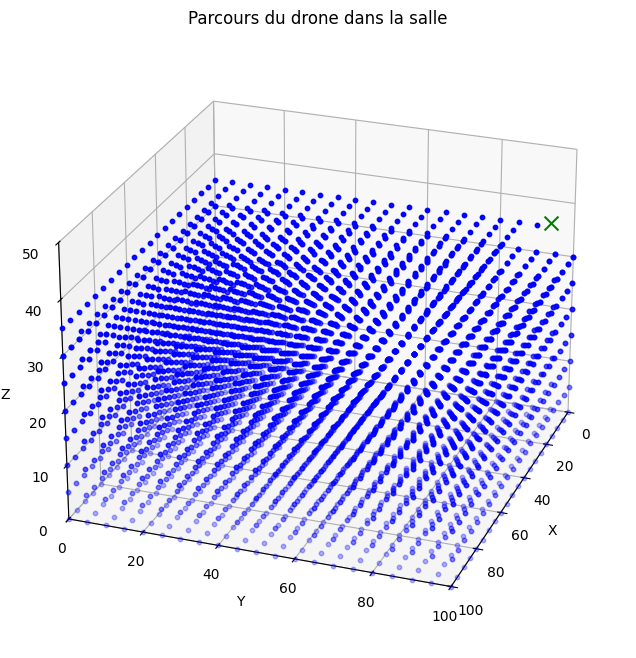

In [ ]:
from random import randint
from math import sqrt

class Salle :
    def __init__(self, Lx, Ly, H):
        self.salle = []
        self.longueur = Lx+1
        self.largeur = Ly+1
        self.hauteur = H+1

    def longueurs(self):
        return self.longueur-1,self.largeur-1,self.hauteur-1

    def createRoom(self):
        for h in range(self.hauteur):
            self.salle.append(h)
            for x in range(self.longueur):
                for y in range(self.largeur):
                    self.salle.append([y,x])
        return self.salle

    def createTarget(self,xmax,ymax,zmax):
        xc = randint(0,xmax)
        yc = randint(0,ymax)
        zc = randint(0,zmax)
        h = 0

        for i,e in enumerate(self.salle):
            if isinstance(e, str):
                continue
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                x,y = e[1],e[0]
                if h == zc and x == xc and y == yc :
                    self.salle[i].append(-1)
        return [xc,yc,zc]

    def affichage(self,coordonnees = None):
        print(coordonnees,self.salle)

    def posDrone(self,drone,x=0,y=0,z=0):
        h=0
        x = drone.getPos()[0]
        y = drone.getPos()[1]
        z = drone.getHeight()

        for i,e in enumerate(self.salle):
            if isinstance(e, int):
                h = e
            elif isinstance(e, list):
                xs,ys = e[0],e[1]
                if h == z and xs == x and ys == y :
                    self.salle[i].append("d")
        return [x,y,z]



class Drone:
    def __init__(self,px = 0, py = 0, pz = 0, map = []):
        self.salle = map
        self.coo_x = px
        self.coo_y = py
        self.coo_z = pz
        self.hastakeOff = False

    def takeOff(self,h=80):
        if self.coo_z == 0:
            self.coo_z = h
            self.hastakeOff = True
    def land(self):
        if self.hastakeOff:
            self.coo_z = 0

    def forward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x += n

    def backward(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_x -= n

    def up(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z += n

    def down(self, n):
        if not 1 <= n <= 250:
            return False
        elif self.hastakeOff :
            self.coo_z -= n

    def left(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y += n

    def right(self, n):
        if not 1 <= n <= 500:
            return False
        elif self.hastakeOff :
            self.coo_y -= n

    def getPos(self):
        return [self.coo_x,self.coo_y]

    def getHeight(self):
        return self.coo_z

    def TargetDetected(self,c_target,c_drone,rayon = 20):
        xt, yt, zt = c_target[0],c_target[1],c_target[2]
        xc, yc, zc = c_drone[0],c_drone[1],c_drone[2]
        distance = sqrt((xc-xt)**2+(yc-yt)**2+(zc-zt)**2)
        if distance <= rayon:
            return True
        return False


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class AlgoColab:
    def __init__(self, drone=None, map=None):
        self.drone = drone
        self.salle = map
        self.drone_positions = []

    def lancement(self):
        self.drone.takeOff(2)

    def c_drone(self):
        return [self.drone.getPos()[0], self.drone.getPos()[1], self.drone.getHeight()]

    def fin(self, c_target, rayon):
        xt, yt, zt = c_target
        xc, yc, zc = self.c_drone()
        distance = sqrt((xc-xt)**2 + (yc-yt)**2 + (zc-zt)**2)
        return distance <= rayon

    def simulate_drone(self, rayon=5, step=5):
        self.lancement()
        c_max_x, c_max_y, c_max_z = self.salle.longueurs()
        target = self.salle.createTarget(c_max_x, c_max_y, c_max_z)

        for z in range(0, c_max_z + 1, step):
            self.drone.coo_z = z
            y_dir_list = [range(0, c_max_y + 1, step), range(c_max_y, -1, -step)]
            for y_dir in y_dir_list:
                for y in y_dir:
                    self.drone.coo_y = y
                    x_range = range(0, c_max_x + 1, step) if y_dir.start == 0 else range(c_max_x, -1, -step)
                    for x in x_range:
                        self.drone.coo_x = x
                        self.drone_positions.append([x, y, z])
                        if self.fin(target, rayon):
                            return target
        return target

    def plot_drone_path(self):
        target = self.simulate_drone(step=5)  # step plus grand = moins de points
        xs, ys, zs = zip(*self.drone_positions)
        total_points = len(xs)

        # Dégradé alpha pour les points : plus anciens = transparents
        alphas = np.linspace(0.1, 1.0, total_points)

        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111, projection='3d')

        # Tracer tous les points en une seule fois
        for i in range(total_points):
            ax.scatter(xs[i], ys[i], zs[i], c='blue', s=10, alpha=alphas[i])

        # Croix verte pour la cible
        ax.scatter(target[0], target[1], target[2], color='green', marker='x', s=100, label='Cible')

        ax.set_xlim(0, self.salle.longueur-1)
        ax.set_ylim(0, self.salle.largeur-1)
        ax.set_zlim(0, self.salle.hauteur-1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Parcours du drone dans la salle')
        ax.view_init(elev=25, azim=20)  # vue de côté

        print(f"Cible trouvée ! Les coordonnées du drone sont : {self.c_drone()} et celles de la cible sont : {target} !\n")
        plt.show()


# --- Exemple d'utilisation ---
salle = Salle(500, 500, 250)
d = Drone()
algo_colab = AlgoColab(d, salle)
algo_colab.plot_drone_path()